In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
poker_train = pd.read_csv('data/poker-hand-training-true.data', 
                          names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'] )

poker_test= pd.read_csv('data/poker-hand-testing.data', 
                        names= ['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'] )

In [18]:
poker_train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [28]:
poker_train['CLASS'].unique()

array([9, 8, 1, 0, 4, 3, 2, 5, 6, 7], dtype=int64)

In [29]:
poker_test['CLASS'].unique()

array([0, 1, 2, 3, 5, 4, 6, 7, 8, 9], dtype=int64)

In [19]:
poker_test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [21]:
poker_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [24]:
cluster= poker_train.drop('CLASS', axis=1)

In [25]:
# scale the data cuz we have seen lot of variation in the data
sc= StandardScaler()

In [27]:
cluster_train = sc.fit_transform(cluster)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

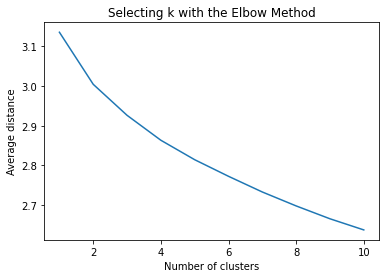

In [40]:
"""
k-means cluster analysis for 1-10 clusters due to the 10 possible class outcomes for poker 
      hands(we can see it in dataset 'CLASS' feature)
"""

from scipy.spatial.distance import cdist

clusters=range(1,11)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cluster_train)
    clusassign=model.predict(cluster_train)
    meandist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 'euclidean'), axis=1))/cluster_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') # pick the fewest number of clusters that reduces the average distance

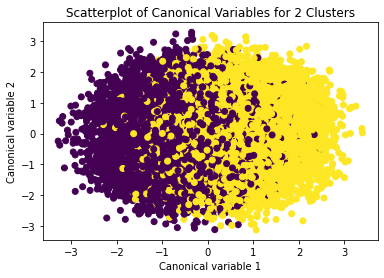

In [46]:
# Above Elbow plot we can assume that 2 clusters are thickkest and farthest 

model=KMeans(n_clusters=2)
model.fit(cluster_train) # has cluster assingments based on using 2 clusters
clust_assign= model.predict(cluster_train)

# plot clusters

"""Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
"""
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(cluster_train) # fit PCA to the train dataset

"""
close or overlapping clusters idicate correlated variables with low in-class variance but not good separation. 
2 cluster might be better.
"""
# plot 1st canonical variable on x axis, 2nd on y-axis

plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_,) 
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 

